In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

## Unidad 3:

### Cálculo Numérico

- Integración.

**1** Resolver las siguientes integrales con los métodos propuestos. (Simpson, trapecio impropias)

a) $\int_0^1 \frac{x^4(1-x)^4}{1+x^2}\;\mathrm{d}x=\frac{22}{7}-\pi.$

b) $\int_0^\infty \frac{x^3}{e^x-1}\;\mathrm{d}x=\frac{\pi^4}{15}$ (aparece en teoría de Debye para la capacidad calorica en crystales).

c) $\int_0^1 x^{-x}\;\mathrm{d}x=\sum_{n=1}^\infty n^{-n}$ (conocida como "Sophomore's dream").

d) $\int_0^1 [\ln(1/x)]^p\;\mathrm{d}x=p!$ si $0 \le p \le 10$.

e) $\int_0^{2\pi} e^{z\cos\theta}\;\mathrm{d}\theta=2\pi I_0(z)$ (donde $I_0(z)$ es la función de Bessel de primera clase definida en $0 \le z \le 2$).

f) $\int _{0}^{\infty }\cos t^{2}\,dt=\int _{0}^{\infty }\sin t^{2}\,dt={\sqrt {\frac {\pi }{8}}}$.

Compare los resultados de los algoritmos dados en este capítulo a los dados por `scipy` o `sympy`.

b y f opcional, Bonus de 1pt (pista: hacer metodo de gauss-hermite)

In [4]:
# Método de Monte Carlo para el cálculo de integrales definidas
def Von_Neumann(f, a, b, N):
    # Generar un conjunto de puntos en el intervalo [a, b]
    x_points = np.linspace(a, b, num=1000)

    # Calcular la función en estos puntos
    y_points = f(x_points)

    # Tomar el mínimo y el máximo
    m = np.min(y_points)
    M = np.max(y_points)

    Nmax = 0
    Nmenos = 0
    for i in range(N):
       x = np.random.uniform(a, b)
       y = np.random.uniform(-m, M)
       # punto dentro del área positiva de la integral
       if (y > 0) and (y < f(x)): 
           Nmax += 1
       # punto dentro del área negativa de la integral
       if (y < 0) and (y > f(x)): 
           Nmenos += 1

    # la integral es el área positiva menos el área negativa
    #  y el área del rectángulo es 2W0(b-a).
    I = (Nmax - Nmenos) / N * (M + m) * (b - a)

    return I

# Método de Simpson 3/8 para el cálculo de integrales definidas
def Simpson3_8(f, a, b, particiones):
   h = (b - a) / particiones
   S = f(a) + f(b)
   for i in range(1, particiones):  # suma en 1, ..., n-1
        x = a + i * h
        if i % 3 == 0:
            S += 2 * f(x)  # suma de términos donde i es múltiplo de tres
        else:
            S += 3 * f(x)  # suma de términos donde i no es múltiplo de tres

   return S * (3 * h / 8)

In [16]:
# Integración con scipy
from scipy.integrate import quad

# a)
a = lambda x: (x**4*(1-x)**4) / (1 + x**2)
valor_esperado_a = 22/7 - np.pi
print(f'Valor de la integral, literal a) {Simpson3_8(a, 0, 1, 100)}')
print(f'Valor esperado: {valor_esperado_a}')
print(f'Valor de la integral con scipy: {quad(a, 0, 1)[0]}\n')

# c)
c = lambda x: x**(-x)
valor_esperado_c = 0
for i in range(1, 1000):
    valor_esperado_c += i ** (-i)

print(f'Valor de la integral, literal c) {Simpson3_8(c, 0, 1, 100)}')
print(f'Valor esperado: {valor_esperado_c}')
print(f'Valor de la integral con scipy: {quad(c, 0, 1)[0]}\n')

# d)
p = 2
d = lambda x: (np.log(1/x))**p
valor_esperado_d = factorial(p)
print(f'Valor de la integral, literal d) {Von_Neumann(d, 0.0001, 1, 10000)}')
print(f'Valor esperado: {valor_esperado_d}')
print(f'Valor de la integral con scipy: {quad(d, 0, 1)[0]}\n')

# e)
z = 1
e = lambda x: np.exp(z * np.cos(x))

# Función de Bessel de primera clase
def bessel_I0(z, terms=50):
    result = 0
    for k in range(terms):
        result += ((z / 2) ** (2 * k)) / ((factorial(k)) ** 2)
    return result

valor_esperado_e = 2 * np.pi * bessel_I0(z)
print(f'El valor de la integral, literal e) {Simpson3_8(e, 0, 2 * np.pi, 100)}')
print(f'Valor esperado: {valor_esperado_e}')
print(f'Valor de la integral con scipy: {quad(e, 0, 2 * np.pi)[0]}\n')

Valor de la integral, literal a) 0.0012644892599587715
Valor esperado: 0.0012644892673496777
Valor de la integral con scipy: 0.0012644892673496185

Valor de la integral, literal c) 1.2887634691005994
Valor esperado: 1.2912859970626636
Valor de la integral con scipy: 1.2912859970626633

Valor de la integral, literal d) 1.8745636967479757
Valor esperado: 2
Valor de la integral con scipy: 1.9999999999999991

El valor de la integral, literal e) 7.9122137467428635
Valor esperado: 7.954926521012844
Valor de la integral con scipy: 7.954926521012844



Puntos extra, integrales impropias por método de Gauss-Hermite

b) $\int_0^\infty \frac{x^3}{e^x-1}\;\mathrm{d}x=\frac{\pi^4}{15}$ (aparece en teoría de Debye para la capacidad calorica en crystales).

f) $\int _{0}^{\infty }\cos t^{2}\,dt=\int _{0}^{\infty }\sin t^{2}\,dt={\sqrt {\frac {\pi }{8}}}$.

Veamos que la integral f) es igual a:
$$ \int _{0}^{\infty }\cos t^{2}\,dt= \frac{1}{2} \int_{-\infty}^{\infty} \cos(t^2) \, dt={\sqrt {\frac {\pi }{8}}}$$
ya que $cos(t^2)$ y $sin(t^2)$ son funciones pares.

*NOTA:* El método de Gauss Hermite es utilizado para resolver integrales de la forma  $\int_{-\infty}^{\infty} e^{-x^2} \, dx$
- Sabemos que $\cos(t^2) = \frac{e^{it^2}}{2} + \frac{e^{-it^2}}{2}$ 

In [101]:
np.sqrt(np.pi/8)

0.6266570686577501

In [118]:
def euler_positive(x):
    return np.exp(1j*x**2)

def euler_negative(x):
    return np.exp(-x**2)

# Aplicando el método de cuadratura de Gauss-Hermite para calcular las anteriores integrales
def Gauss_Hermite(f, N):
    # Definir los pesos y los nodos
    x, w = np.polynomial.hermite.hermgauss(N)

    # Calcular la integral
    integral = 0
    for i in range(N):
        integral += w[i] * f(x[i])

    return integral

print(f'Valor de la integral, literal e) {Gauss_Hermite(euler_positive, 100)}')
print(f'Valor de la integral, literal e) {Gauss_Hermite(euler_negative, 100)}')

Valor de la integral, literal e) (1.376996331853154+0.5703705559915792j)
Valor de la integral, literal e) 1.2533141373155006


In [115]:
1.376996331853154/2

0.688498165926577

In [96]:
import numpy as np
from scipy.special import roots_hermite
from scipy.integrate import quad

# Define the function to integrate
def f(x):
    return np.exp(-1j * x**2) / 2 + np.exp(1j * x**2) / 2

# Number of points to use in the quadrature
N = 10

# Get the roots and weights for Gauss-Hermite quadrature
x, w = roots_hermite(N)

# Calculate the integral
integral = np.sum(w * f(x))

# The result is complex, take the real part
integral = integral.real

print(integral)

1.3769892273804147


In [99]:
from sympy import symbols, sin, cos, integrate, oo, limit

# Definir los símbolos x y t
x, t = symbols('x t')

# Definir las funciones S(x) y C(x)
S = integrate(sin(t**2), (t, 0, x))
C = integrate(cos(t**2), (t, 0, x))

# Calcular los límites cuando x tiende a infinito
limit_S = limit(S, x, oo).evalf()
limit_C = limit(C, x, oo).evalf()

print("Límite de S(x) cuando x tiende a infinito:", limit_S)
print("Límite de C(x) cuando x tiende a infinito:", limit_C)


Límite de S(x) cuando x tiende a infinito: 0.626657068657750
Límite de C(x) cuando x tiende a infinito: 0.626657068657750


In [86]:
import numpy as np
from scipy import integrate, special

f = lambda t: np.exp(-t**2) * special.eval_hermite(12, t) * special.eval_hermite(16, t)

abs_ig, abs_err = integrate.quad(lambda t: abs(f(t)), -np.inf, np.inf)
ig, err = integrate.quad(f, -np.inf, np.inf)

print(ig)
# -10.203125
print(abs_ig)
# 2.22488114805e+15
print(ig / abs_ig, err / abs_ig)
# -4.58591912155e-15  1.18053770382e-14

0.484375
2224881148046432.0
2.1770825845025828e-16 1.1612533628958522e-14


C:\Users\User\AppData\Local\Temp\ipykernel_1900\1321533683.py:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  abs_ig, abs_err = integrate.quad(lambda t: abs(f(t)), -np.inf, np.inf)
C:\Users\User\AppData\Local\Temp\ipykernel_1900\1321533683.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  ig, err = integrate.quad(f, -np.inf, np.inf)


**2** La [capacidad calorífica](https://es.wikipedia.org/wiki/Capacidad_calor%C3%ADfica) o capacidad térmica de un cuerpo, $C_V$, se define como el cociente entre la cantidad de energía calorífica transferida a un cuerpo y el cambio de temperatura que experimenta, es decir, $C_V$, mide la energía necesaria para aumentar la temperatura de un cuerpo en una unidad de temperatura. Según la teoría de Debye la capacidad calórica es dada por la integral,

$$
\frac {C_{V}}{Nk}=9\left({T \over T_{\rm {D}}}\right)^{3}\int _{0}^{T_{\rm {D}}/T}{x^{4}e^{x} \over \left(e^{x}-1\right)^{2}}\,dx,
$$

donde $T_D$ es la temperatura de Debye, $k$ es la constate de Bolzmann y $N$ el número de partículas contenidas en el volumen $V$.

a) Use los métodos de integración para graficar la capacidad calórica, $C_V/3Nk$, como función de $T/T_D$ en el intervalo $[0,1.5]$.

b) Einstein había propuesto inicialmente el modelo,

$$\frac{C_V}{3Nk}=\left({\epsilon\over k T}\right)^2{e^{\epsilon/kT}\over \left(e^{\epsilon/kT}-1\right)^2},$$

con energía dada por $\frac{\epsilon}{kT_D} = \frac{\hbar \omega}{kT_D} = \sqrt{3}\frac{\pi}{6}=0.805995977$, donde $\omega$ es definida como la frecuencia del oscilador usado en el modelo de Einstein.
Grafique y compare al modelo de Debye.

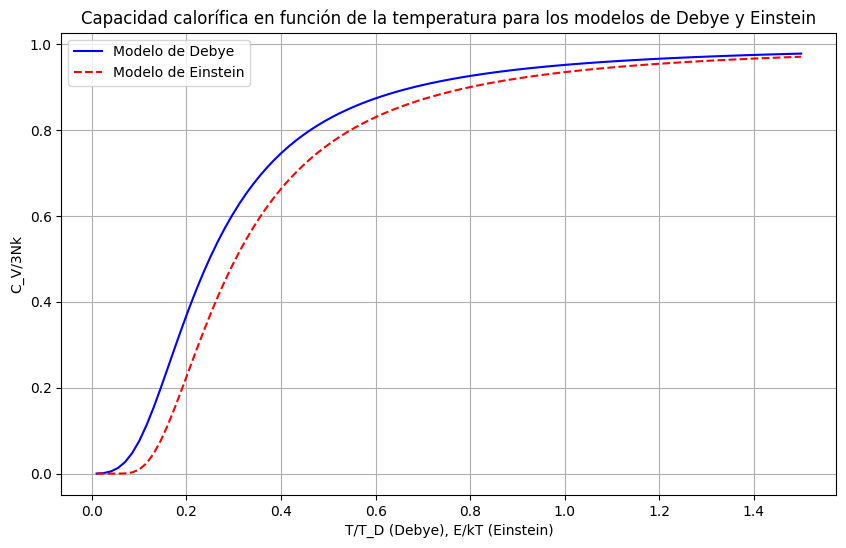

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Modelo de Debye
# Integral del modelo de Debye
def integral_debye(x):
    return x**4 * np.exp(x) / (np.exp(x) - 1)**2

# Cv/3Nk en función de T/T_D
def modelo_debye(ratio_T, n=1000):
    integral = Simpson3_8(integral_debye, 0.01, 1/ratio_T, n)
    return 3 * ratio_T**3 * integral

# Modelo de Einstein
# Cv/3Nk en función de E/kT calculado con T/T_D considerando E/kT = sqrt(3) * pi**2 / 6
def modelo_einstein(ratio_T_TD, n=1000):
    epsilon_k_T = np.sqrt(3) * np.pi/6 * ratio_T_TD
    Cv_3Nk_einstein = epsilon_k_T**2 * np.exp(epsilon_k_T) / (np.exp(epsilon_k_T) - 1)**2
    return Cv_3Nk_einstein

# Valores de T/T_D
ratios_T = np.linspace(0.01, 1.5, 100)  # comienza desde 0.01 para evitar la división por cero

# Capacidades de calor para los modelos de Debye y Einstein
Cv_debye = np.array([modelo_debye(ratio_T) for ratio_T in ratios_T])
Cv_einstein = np.array([modelo_einstein(1/ratio_T) for ratio_T in ratios_T])

plt.figure(figsize=(10, 6))

plt.plot(ratios_T, Cv_debye, label='Modelo de Debye', color='blue', linestyle='-')
plt.plot(ratios_T, Cv_einstein, label='Modelo de Einstein', color='red', linestyle='--')

plt.title('Capacidad calorífica en función de la temperatura para los modelos de Debye y Einstein')
plt.xlabel('T/T_D (Debye), E/kT (Einstein)')
plt.ylabel('C_V/3Nk')
plt.grid(True)
plt.legend()
plt.show()

**3** **Por librería o elección** En electromagnetismo se puede demostrar que el potencial producido por un anillo de radio $a=1.0$ m en el plano $xy$ con distribución de carga $\lambda$, en un punto P fuera del eje $z$ es dado por,

$$V = \frac{\lambda}{2 \pi \varepsilon_0}\sqrt{\frac{am}{x}} K(m)$$

donde,

$$m = \frac{2}{1 + \frac{z^{2} + x^{2} + a^{2}}{2 a x}},$$

y $K(m)$ es la integral elíptica completa de primera especie definida como,

$$K(m) = \int_{0}^{\pi/2} \frac{d  \phi}{\sqrt{1 - m \text{sen}^{2}(\phi)}}$$

a) Si  $\frac{\lambda}{2\pi\varepsilon_0}=1.0$, ¿cuál es el potencial eléctrico en el punto $(x,y,z)=(1.5,0,1.0)$?<br>

b) Grafique la solución para el caso en que $-100<x<100$ use pasos de $0.01$. ¿Qué puede concluir de la gráfica?si $z=cte$

c) La solución analítica es dada por la serie,

$$ K(m)={\frac {\pi }{2}}\sum _{n=0}^{\infty }\left({\frac {(2n)!}{2^{2n}(n!)^{2}}}\right)^{2}m^{n}={\frac {\pi }{2}}\sum _{n=0}^{\infty }{\bigl (}P_{2n}(0){\bigr )}^{2}m^{n},$$

donde y $P_n$ son los [polinomios de Legendre](#MATERIAL_COMPLEMENTARIO). Equivalentemente, también,

$$K(m)={\frac {\pi }{2}}\left(1+\left({\frac {1}{2}}\right)^{2}m+\left({\frac {1\cdot 3}{2\cdot 4}}\right)^{2}m^{2}+\cdots +\left({\frac {\left(2n-1\right)!!}{\left(2n\right)!!}}\right)^{2}m^{n}+\cdots \right),$$

donde $n!!$ es el doble factorial. Grafique y compare estas tres soluciones a la dada por la integral numérica ¿Qué concluye? (Nota: tenga cuidado con $x\leq 0$, en las series, considere la simetría para esto).


El potencial en el punto (1.5, 0, 1.0) es 2.1150424857741323


C:\Users\User\AppData\Local\Temp\ipykernel_1900\1256933139.py:19: RuntimeWarning: invalid value encountered in sqrt
  return lambda_2pi_epsilon0 * np.sqrt(a * m(x)) * K(m(x))


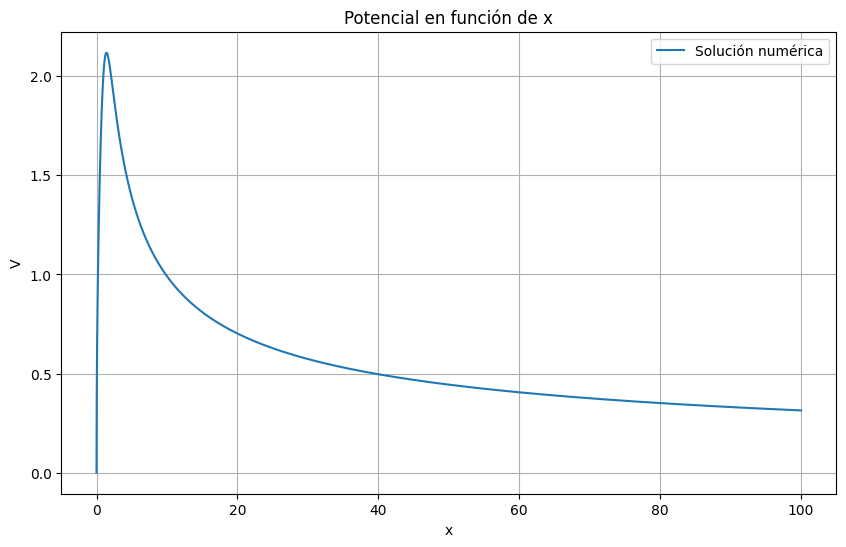

In [137]:
from scipy import integrate
from scipy.special import legendre

# Constantes
a = 1.0
lambda_2pi_epsilon0 = 1.0
z = 1.0

# Funciones
def m(x):
    return 2 / (1 + (z**2 + x**2 + a**2) / (2 * a * x))

def K(m):
    return integrate.quad(lambda phi: 1 / np.sqrt(1 - m * np.sin(phi)**2), 0, np.pi/2)[0]

def V(x):
    return lambda_2pi_epsilon0 * np.sqrt(a * m(x)) * K(m(x))

def K_series(m, n_terms=100):
    return np.pi/2 * np.sum([(legendre(2*n)[0])**2 * m**n for n in range(n_terms)])

# a) Potencial en el punto (1.5, 0, 1.0), (z=1.0 puesto arriba)
x_point = 1.5
V_point = V(x_point)
print(f'El potencial en el punto (1.5, 0, 1.0) es {V_point}')

# b) Gráfica de la solución para -100 < x < 100
x_values = np.arange(-100, 100, 0.01)
V_values = np.array([V(x) for x in x_values])

plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label='Solución numérica')
plt.title('Potencial en función de x')
plt.xlabel('x')
plt.ylabel('V')
plt.grid(True)
plt.legend()
plt.show()

In [123]:
import numpy as np
from scipy.special import legendre

def K_analytical(m, n_terms=100):
    sum_terms = 0
    for n in range(n_terms):
        Pn = legendre(2*n)
        sum_terms += (Pn(0)**2) * (m**n)
    return (np.pi / 2) * sum_terms

In [124]:
print(K_analytical(0.5, 100))

1.8540746773013705


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\special\_orthogonal.py:2457: RuntimeWarning: overflow encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\special\_orthogonal.py:2457: RuntimeWarning: invalid value encountered in double_scalars
  kn = _gam(2 * n + 1) / _gam(n + 1)**2 / 2.0**n


In [138]:
# Función para calcular el doble factorial
def double_factorial(n):
    if n <= 0:
        return 1
    else:
        return n * double_factorial(n-2)

# Función para calcular K(m) usando la serie
def K_series(m, n_terms=100):
    return np.pi/2 * np.sum([((double_factorial(2*n-1) / double_factorial(2*n))**2) * m**n for n in range(n_terms)])

# Calcular el valor de K(m) para el valor de m en el punto de interés
m_point = m(x_point)
K_point = K_series(m_point)
print(f'El valor de K(m) en el punto (1.5, 0, 1.0) es {K_point}')

El valor de K(m) en el punto (1.5, 0, 1.0) es 2.324943877132628
